## CAPSTONE PROJECT : CAR ACCIDENT SEVERITY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import dates as dates
from matplotlib.ticker import NullFormatter
import seaborn as sns
from sklearn import (svm, preprocessing)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import (recall_score, precision_score, accuracy_score, confusion_matrix,)
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

## Load Data From CSV File

In [2]:
data_train = pd.read_csv(r"C:\Users\SJA6COB\Desktop\Accident_train.csv")
data_test = pd.read_csv(r"C:\Users\SJA6COB\Desktop\Accident_test.csv")

In [3]:
# Displaying first 5 rows of train datset
data_train.head()

,Collision_Ref_No,Policing_Area,Collision_Severity,Weekday_of_Collision,Day_of_Collision,Month_of_Collision,Hour_of_Collision,Carriageway_Type,Speed_Limit,Junction_Detail,Junction_Control,Ped_Crossing_HC,Ped_Crossing_PC,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site
0,3518,CREA,3,MON,4,8,14.0,13,60,1.0,1.0,1.0,1.0,2,9,9.0,1.0
1,10557,BELC,3,SAT,8,8,17.0,11,50,12.0,7.0,1.0,1.0,4,3,1.0,1.0
2,5002,LISB,3,WED,5,11,17.0,1,60,12.0,7.0,1.0,1.0,2,2,2.0,1.0
3,11714,BELC,3,SUN,18,10,16.0,12,70,6.0,NaN,1.0,1.0,1,3,1.0,1.0
4,12416,MIDU,3,MON,23,11,9.0,13,60,6.0,7.0,1.0,1.0,2,3,1.0,1.0


In [4]:
# Displaying first 5 rows of test dataset
data_test.head()

,Collision_Ref_No,Policing_Area,Collision_Severity,Weekday_of_Collision,Day_of_Collision,Month_of_Collision,Hour_of_Collision,Carriageway_Type,Speed_Limit,Junction_Detail,Junction_Control,Ped_Crossing_HC,Ped_Crossing_PC,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site
0,812,DAST,Predict,MON,17,2,21.0,13,60,10.0,7.0,1.0,1.0,5.0,9.0,6.0,1.0
1,7159,ARBC,Predict,TUE,13,1,8.0,13,60,10.0,NaN,1.0,1.0,7.0,1.0,1.0,1.0
2,11833,NEMD,Predict,SAT,24,10,18.0,13,30,6.0,7.0,1.0,1.0,6.0,1.0,1.0,1.0
3,9142,MEAN,Predict,SUN,10,5,13.0,11,70,12.0,7.0,1.0,1.0,1.0,9.0,1.0,1.0
4,378,FOYL,Predict,THU,23,1,10.0,13,60,1.0,1.0,1.0,1.0,2.0,3.0,2.0,1.0


In [5]:
data_train.shape, data_test.shape

((8849, 17), (1549, 17))

## Data visualization and Pre-processing

### Lets check accident counts for each value of each environmental condition

**Lighting_Conditions**
1 :  Daylight : street lights present,2 :  Daylight : no street lighting,3 :  Daylight : street lighting unknown,4 :  Darkness : street lights present and lit,5 :  Darkness : street lights present but unlit,6 :  Darkness : no street lighting,7 :  Darkness : street lighting unknown

**Weather_Conditions**
1 :  Fine without high winds,2 :  Raining without high winds,3 :  Snowing without high winds,4 :  Fine with high winds,5 :  Raining with high winds,6 :  Snowing with high winds,7 :  Fog or mist - if hazard,8 :  Strong sun (glaring),9 :  Other,10 :  Unknown

**Road_Surface_Conditions**
1 :  Dry, 2 :  Wet / damp,3 :  Snow,4 :  Frost / ice,5 :  Flood,6 :  Oil,7 :  Mud,8 :  Leaves,9 :  Slippery (after dry spell)
10 :  Other


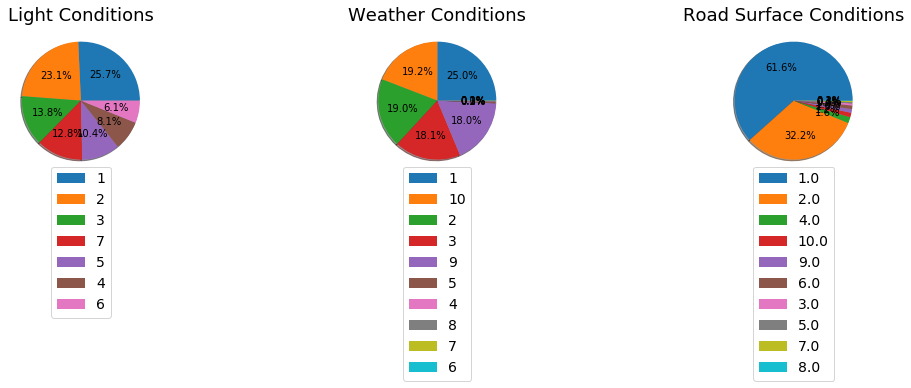

In [6]:
#Plot summary of accident counts for each value of each environmental condition
fig4,ax4 = plt.subplots(1,3,figsize=(15,5))
ax4[0].pie(data_train['Light_Conditions'].value_counts(), shadow=True,autopct='%1.1f%%')
ax4[0].set_title('Light Conditions',fontsize=18)
pieleg0 = ax4[0].legend(labels=data_train['Light_Conditions'].value_counts().index,bbox_to_anchor=(0.5,0.1), fontsize=14,loc="upper center")
ax4[1].pie(data_train['Weather_Conditions'].value_counts(), shadow=True,autopct='%1.1f%%')
ax4[1].set_title('Weather Conditions',fontsize=18)
pieleg1 = ax4[1].legend(labels=data_train['Weather_Conditions'].value_counts().index,bbox_to_anchor=(0.5,0.1), fontsize=14,loc="upper center")
ax4[2].pie(data_train['Road_Surface_Conditions'].value_counts(), shadow=True,autopct='%1.1f%%')
ax4[2].set_title('Road Surface Conditions',fontsize=18)
pieleg2 = ax4[2].legend(labels=data_train['Road_Surface_Conditions'].value_counts().index,bbox_to_anchor=(0.5,0.1), fontsize=14,loc="upper center")
plt.savefig('Condition Pies.jpg', bbox_extra_artists=(pieleg0,pieleg1,pieleg2), bbox_inches='tight')
plt.tight_layout()

### Lets check distribution of accidents

In [7]:
#Calculate distribution of accidents throughout the year by daywise
#Group accidents by Day_of_Collision
Coll_day = data_train[['Day_of_Collision','Collision_Severity']].groupby('Day_of_Collision').count()
Coll_day['Day_of_Collision'] = Coll_day.index
# Coll_day

#Identify outliers
dailyAccMean = Coll_day['Collision_Severity'].mean()
dailyAccSD = Coll_day['Collision_Severity'].std()

check_high = dailyAccMean + 2*dailyAccSD
check_low = dailyAccMean - 2*dailyAccSD
Coll_day['isOutlier'] = (Coll_day['Collision_Severity'] > check_high)|(Coll_day['Collision_Severity'] < check_low)
Coll_day['pltColour'] = '#B9BCC0'
Coll_day.loc[Coll_day['isOutlier'] == True, 'pltColour'] = 'r'

Text(0.5, 1.0, 'Accident Count Per Day')

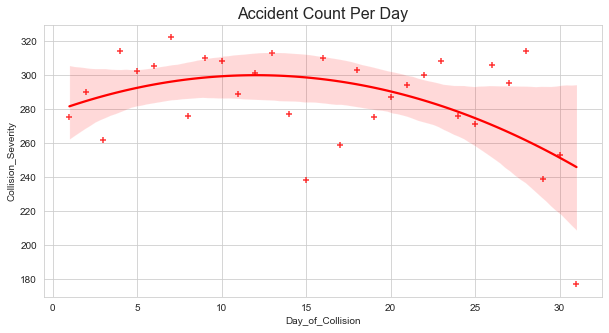

In [8]:
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
ax1=sns.regplot(x=Coll_day['Day_of_Collision'], y=Coll_day['Collision_Severity'], marker="+",order=2, color='r')
plt.title('Accident Count Per Day', fontsize=16)

In [9]:
#Calculate the distribution of accidents throughout the day
byHour = data_train[['Hour_of_Collision','Collision_Severity']].groupby('Hour_of_Collision').count()
byHour['Collision_Severity'] = byHour['Collision_Severity'].apply(lambda x: x/366) # Transform total to per day value

C:\Users\SJA6COB\.conda\envs\TF_env\lib\site-packages\seaborn\relational.py:823: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
C:\Users\SJA6COB\.conda\envs\TF_env\lib\site-packages\seaborn\relational.py:834: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)


Text(0.5, 0, 'Time of Day')

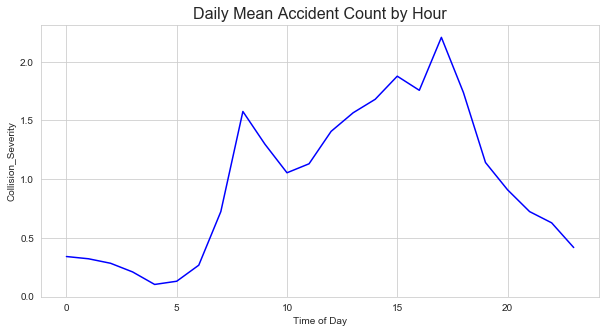

In [10]:
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
ax = sns.lineplot(x=byHour.index, y=byHour['Collision_Severity'], c="b")
ax.set_title('Daily Mean Accident Count by Hour', fontsize=16)
ax.set_xlabel('Time of Day')

#### Let’s see how many of each class is in our data set 

**Collision_Severity**
1 :  Fatal injury collision,2 :  Serious injury collision,3 :  Slight injury collision

In [11]:
df_Coll_Sev = data_train["Collision_Severity"].value_counts()
df_Coll_Sev

3    7896
2     842
1     111
Name: Collision_Severity, dtype: int64

In [12]:
df_Coll_sev1 = round((df_Coll_Sev/8849)*100,2)
df_Coll_sev1.head()

3    89.23
2     9.52
1     1.25
Name: Collision_Severity, dtype: float64

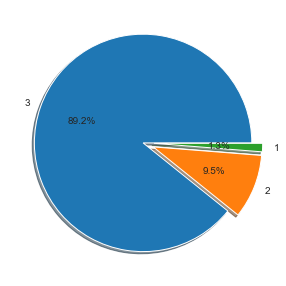

In [13]:
plt.figure(figsize=(10,5))
plt.pie(df_Coll_sev1,labels = df_Coll_sev1.index,autopct='%1.1f%%', shadow=True,explode = (0, 0.1,0.1))
plt.show()

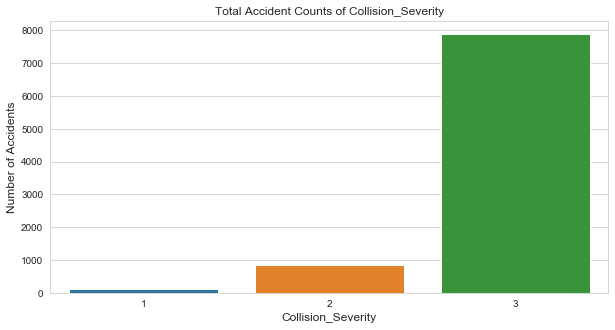

In [14]:
# Plotting a bar graph of the number of Accidents
# in the "Collision_Severity"
plt.figure(figsize=(10,5))
sns.countplot(x="Collision_Severity", data = data_train )
plt.title('Total Accident Counts of Collision_Severity')
plt.ylabel('Number of Accidents', fontsize=12)
plt.xlabel('Collision_Severity', fontsize=12)
plt.show()

In [15]:
df_Coll_WD = data_train["Weekday_of_Collision"].value_counts()

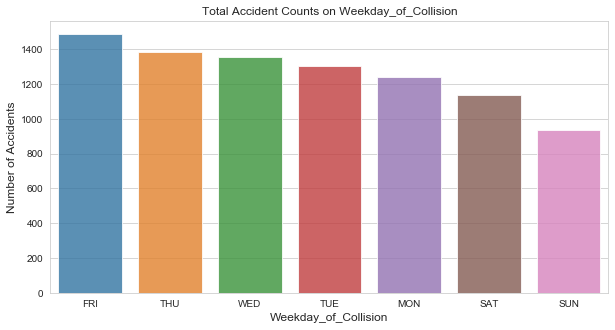

In [16]:
# Plotting a bar graph of the number of stores in each city, for the first ten cities listed
# "Weekday_of_Collision"
df_Coll_WD = df_Coll_WD[:10,]
plt.figure(figsize=(10,5))
ax = sns.barplot(df_Coll_WD.index, df_Coll_WD.values, alpha=0.8)
plt.title('Total Accident Counts on Weekday_of_Collision')
plt.ylabel('Number of Accidents', fontsize=12)
plt.xlabel('Weekday_of_Collision', fontsize=12)

plt.show()

In [17]:
df_Coll_PA=data_train["Policing_Area"].value_counts()
df_Coll_PA

BELC    1110
ARBC     401
NEMD     392
LISC     385
LISB     332
BELS     329
ANTN     311
ARND     302
DCST     293
MIDU     292
BELN     268
CCGL     268
MEAN     267
FERO     254
FOYL     249
CRAI     228
NEWM     223
BELW     207
NABB     185
BELE     181
ARDS     167
DOWN     157
BMEN     154
NDOW     143
ANTR     137
CREA     131
DAST     126
ARMA     123
COLE     115
FERM     114
OMAG     108
BANB     102
MFEL      94
LIMA      77
CFER      65
STRB      65
BMON      62
COOK      61
LARN      58
MOYL      26
Name: Policing_Area, dtype: int64

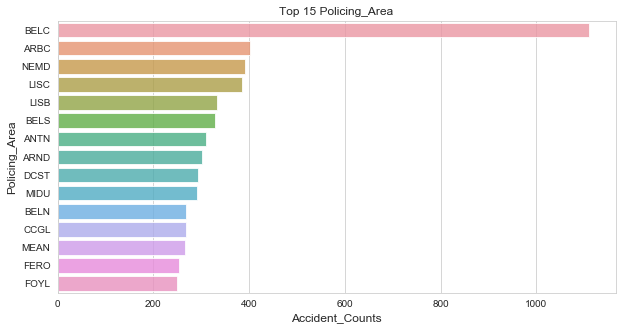

In [18]:
# Plotting a bar graph of the number of Collisions in each city, for the first 15 cities listed
# in the column 'City'
df_Coll_PA = df_Coll_PA[:15,]
plt.figure(figsize=(10,5))
sns.barplot(df_Coll_PA.values, df_Coll_PA.index, alpha=0.8)
plt.title('Top 15 Policing_Area')
plt.ylabel('Policing_Area', fontsize=12)
plt.xlabel('Accident_Counts', fontsize=12)
plt.show()

#### Now lets check their correlation

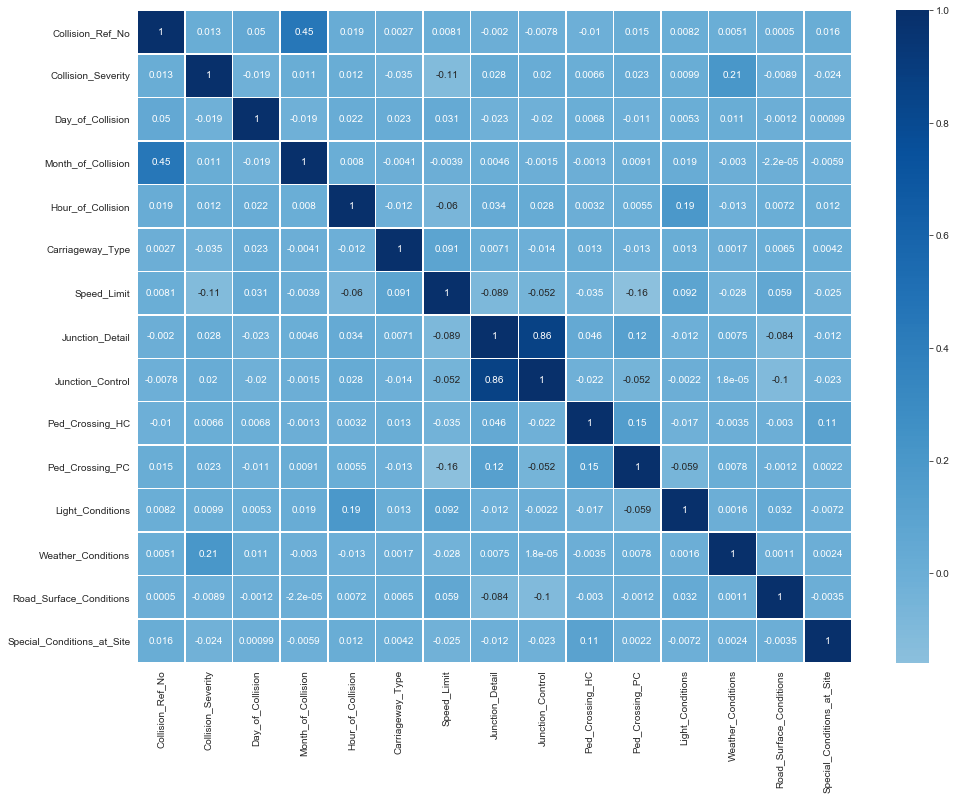

In [19]:
sns.set_palette('deep')
plt.figure(figsize = (16,12))
sns.heatmap(data_train.corr(),cmap = 'Blues',annot = True,center = 0,linewidths=.5)

In [20]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8849 entries, 0 to 8848
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Collision_Ref_No            8849 non-null   int64  
 1   Policing_Area               8562 non-null   object 
 2   Collision_Severity          8849 non-null   int64  
 3   Weekday_of_Collision        8849 non-null   object 
 4   Day_of_Collision            8849 non-null   int64  
 5   Month_of_Collision          8849 non-null   int64  
 6   Hour_of_Collision           8601 non-null   float64
 7   Carriageway_Type            8849 non-null   int64  
 8   Speed_Limit                 8849 non-null   int64  
 9   Junction_Detail             8593 non-null   float64
 10  Junction_Control            8590 non-null   float64
 11  Ped_Crossing_HC             8573 non-null   float64
 12  Ped_Crossing_PC             8584 non-null   float64
 13  Light_Conditions            8849 

### Label Encoding of train data

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# lable encoder for data_train
le.fit(data_train['Weekday_of_Collision'])
data_train['Weekday_of_Collision'] = le.transform(data_train['Weekday_of_Collision'])
le.fit(data_train['Policing_Area'].astype(str))
data_train['Policing_Area'] = le.transform(data_train['Policing_Area'].astype(str))

In [22]:
# Converting Nan Values to mean/mode etc.,
data_train.isna().any()

Collision_Ref_No              False
Policing_Area                 False
Collision_Severity            False
Weekday_of_Collision          False
Day_of_Collision              False
Month_of_Collision            False
Hour_of_Collision              True
Carriageway_Type              False
Speed_Limit                   False
Junction_Detail                True
Junction_Control               True
Ped_Crossing_HC                True
Ped_Crossing_PC                True
Light_Conditions              False
Weather_Conditions            False
Road_Surface_Conditions        True
Special_Conditions_at_Site     True
dtype: bool

In [23]:
# Taking care of missing values with most frequent values
data_train = data_train.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [24]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8849 entries, 0 to 8848
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Collision_Ref_No            8849 non-null   int64  
 1   Policing_Area               8849 non-null   int32  
 2   Collision_Severity          8849 non-null   int64  
 3   Weekday_of_Collision        8849 non-null   int32  
 4   Day_of_Collision            8849 non-null   int64  
 5   Month_of_Collision          8849 non-null   int64  
 6   Hour_of_Collision           8849 non-null   float64
 7   Carriageway_Type            8849 non-null   int64  
 8   Speed_Limit                 8849 non-null   int64  
 9   Junction_Detail             8849 non-null   float64
 10  Junction_Control            8849 non-null   float64
 11  Ped_Crossing_HC             8849 non-null   float64
 12  Ped_Crossing_PC             8849 non-null   float64
 13  Light_Conditions            8849 

In [25]:
data_train.head()

,Collision_Ref_No,Policing_Area,Collision_Severity,Weekday_of_Collision,Day_of_Collision,Month_of_Collision,Hour_of_Collision,Carriageway_Type,Speed_Limit,Junction_Detail,Junction_Control,Ped_Crossing_HC,Ped_Crossing_PC,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site
0,3518,19,3,1,4,8,14.0,13,60,1.0,1.0,1.0,1.0,2,9,9.0,1.0
1,10557,7,3,2,8,8,17.0,11,50,12.0,7.0,1.0,1.0,4,3,1.0,1.0
2,5002,28,3,6,5,11,17.0,1,60,12.0,7.0,1.0,1.0,2,2,2.0,1.0
3,11714,7,3,3,18,10,16.0,12,70,6.0,7.0,1.0,1.0,1,3,1.0,1.0
4,12416,32,3,1,23,11,9.0,13,60,6.0,7.0,1.0,1.0,2,3,1.0,1.0


### Label Encoding of test data

In [26]:
# lable encoder for data_test
le.fit(data_test['Collision_Severity'])
data_test['Collision_Severity'] = le.transform(data_test['Collision_Severity'])
le.fit(data_test['Weekday_of_Collision'])
data_test['Weekday_of_Collision'] = le.transform(data_test['Weekday_of_Collision'])
le.fit(data_test['Policing_Area'].astype(str))
data_test['Policing_Area'] = le.transform(data_test['Policing_Area'].astype(str))

In [27]:
# Converting Nan Values to median/mean/mode etc.,
data_test.isna().any()

Collision_Ref_No              False
Policing_Area                 False
Collision_Severity            False
Weekday_of_Collision          False
Day_of_Collision              False
Month_of_Collision            False
Hour_of_Collision              True
Carriageway_Type              False
Speed_Limit                   False
Junction_Detail                True
Junction_Control               True
Ped_Crossing_HC                True
Ped_Crossing_PC                True
Light_Conditions               True
Weather_Conditions             True
Road_Surface_Conditions        True
Special_Conditions_at_Site     True
dtype: bool

In [28]:
data_test = data_test.fillna(data_test.median())

### Feature selection

In [29]:
labels_train = data_train["Collision_Severity"]
data_train_x = data_train.drop(["Collision_Severity", "Collision_Ref_No"], axis=1)

data_test_x = data_test.drop(["Collision_Severity", "Collision_Ref_No"], axis=1)

In [30]:
data_train_x.shape, data_test_x.shape

((8849, 15), (1549, 15))

### Splitting data into Train & Test

In [31]:
import collections
import numpy as np
from sklearn.decomposition import PCA

# splitting test vales into parts to find get lables
data_variables = train_test_split(data_train_x, labels_train, test_size = 0.20, random_state = 4)
#data_variables = train_test_split(data_train, labels_train, test_size=0.33, random_state=99)
data_train_l, data_test_l, labels_train_l, labels_test_l = data_variables

print ('Train set:', data_train_l.shape, labels_train_l.shape)
print ('Test set:', data_test_l.shape,  labels_test_l.shape)

Train set: (7079, 15) (7079,)
Test set: (1770, 15) (1770,)


### Normalize Data
Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [32]:
scaler = preprocessing.StandardScaler().fit(data_train_l)
train_data_scaled = scaler.transform(data_train_l)
test_data_scaled = scaler.transform(data_test_l)

test_data_scaled_x = scaler.transform(data_test_x)

### Classification
Now, using the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

- XGB Classifier
- Random Forest Classifier
- Support Vector Machine
- Logistic Regression
- Gaussian Naive Bayes

### XGB Classifier

In [33]:

xgboost = XGBClassifier()
xgboost.fit(train_data_scaled, labels_train_l)
Y_pred_xgb = xgboost.predict(test_data_scaled) # Predict Y
a = np.array(Y_pred_xgb)
predict_xgboost = collections.Counter(a)
acc_xgboost = round(xgboost.score(test_data_scaled, labels_test_l) * 100, 2) # Accuracy
print("acc_xgboost :",acc_xgboost)

acc_xgboost : 88.64


### Random Forest Classifier

In [34]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(train_data_scaled, labels_train_l)
Y_pred = rf.predict(test_data_scaled)
a = np.array(Y_pred)
predict_random_forest = collections.Counter(a)
acc_rf = round(rf.score(test_data_scaled, labels_test_l) * 100, 2)
print("acc_random_forest :",acc_rf)

acc_random_forest : 88.7


### Support Vector Machine

In [35]:
svc = SVC()
svc.fit(train_data_scaled, labels_train_l)
Y_pred = svc.predict(test_data_scaled)
a = np.array(Y_pred)
predict_svc = collections.Counter(a)
acc_svc = round(svc.score(test_data_scaled, labels_test_l) * 100, 2)
print("acc_svc :",acc_svc)

acc_svc : 88.59


### Logistic Regression

In [36]:
logreg = LogisticRegression()
logreg.fit(train_data_scaled, labels_train_l)
Y_pred = logreg.predict(test_data_scaled)
a = np.array(Y_pred)
predict_log = collections.Counter(a)
acc_log = round(logreg.score(test_data_scaled, labels_test_l) * 100, 2)
print("acc_log :",acc_log)

acc_log : 88.59


### Gaussian Naive Bayes

In [37]:
gaussian = GaussianNB()
gaussian.fit(train_data_scaled, labels_train_l)
Y_pred = gaussian.predict(test_data_scaled)
a = np.array(Y_pred)
predict_gaussian = collections.Counter(a)
acc_gaussian = round(gaussian.score(test_data_scaled, labels_test_l) * 100, 2)

### Report Table

In [38]:
models = pd.DataFrame({
    'Model': ['XGBoost','Random Forest','Support Vector Machines', 'Logistic Regression', 
               'Naive Bayes'],
    'Score': [acc_xgboost, acc_rf, acc_svc, acc_log, 
               acc_gaussian],
    'Count': [predict_xgboost, predict_random_forest, predict_svc, predict_log, 
               predict_gaussian]})
models.sort_values(by='Score', ascending=False)

,Model,Score,Count
1,Random Forest,88.70,"{3: 1737, 2: 32, 1: 1}"
0,XGBoost,88.64,"{3: 1664, 2: 104, 1: 2}"
2,Support Vector Machines,88.59,{3: 1770}
3,Logistic Regression,88.59,{3: 1770}
4,Naive Bayes,21.41,"{1: 1365, 2: 43, 3: 362}"
